<a href="https://colab.research.google.com/github/robotics-upo/rva-course-material/blob/master/intro_to_opencv_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal

Learn to:

    Access pixel values and modify them
    Access image properties
    Set a Region of Interest (ROI)
    Split and merge images

Almost all the operations in this section are mainly related to Numpy rather than OpenCV. A good knowledge of Numpy is required to write better optimized code with OpenCV.

*( Examples will be shown in a Python terminal, since most of them are just single lines of code )*

[  3 204  92]


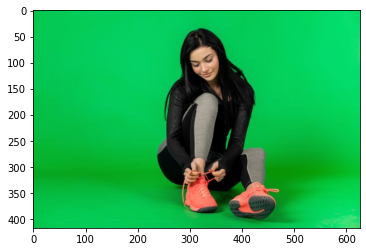

In [6]:
import numpy as np
import cv2 as cv

#We can use OpenCV in Colab, but not its functions for creating plots
#We use matplotlib for generating plots
from matplotlib import pyplot as plt

#We use the library scikit to read images from url 
#In OpenCV, the function to read from file is cv2.imread
from skimage import io

#imread from skimage returns the color image as RGB. In OpenCV, the image is
#returned as BGR
im = io.imread('https://robotics.upo.es/~lmercab/rva/croma.jpg')

#Show image
plt.imshow(im)

px = im[100,100]
print (px)

**Accessing Image Properties**

Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color): 

In [8]:
print( im.shape )

print( im.size )

print( im.dtype )

(417, 626, 3)
783126
uint8


**Image ROI**

Sometimes, you will have to play with certain regions of images. For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image: 

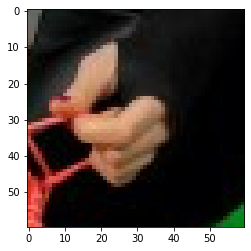

In [9]:
hand = im[280:340, 330:390]

plt.imshow(hand)

**Splitting and Merging Image Channels**

Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. In other cases, you may need to join these individual channels to create a BGR image. You can do this simply by: 

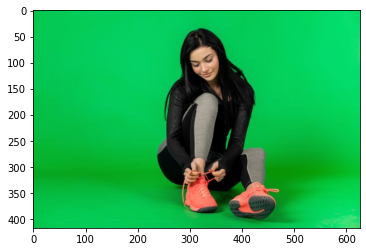

In [11]:
b, g, r = cv.split(im)
im_copy = cv.merge((b,g,r))
plt.imshow(im_copy)

You can access to a particular channel (blue is zero channel) or even remove the information from one channel (red is channel 2)

[[ 6  6  6 ...  3  3  3]
 [ 6  6  6 ...  4  3  3]
 [ 7  6  6 ...  4  3  3]
 ...
 [ 5  5  4 ... 54 57 58]
 [ 5  5  3 ... 42 50 51]
 [ 5  5  6 ... 35 46 52]]


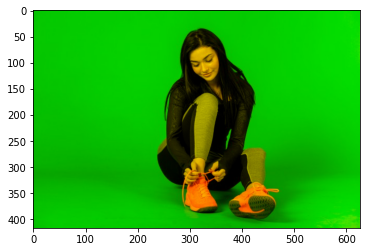

In [23]:
b = im[:,:,0]
print(b)
im_copy = im
im_copy [:,:,2] = 0

plt.imshow(im_copy)

**Warning**

cv.split() is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.

**Making Borders for Images (Padding)**

If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:



*   **src** - input image
*   **top, bottom, left, right** - border width in number of pixels in corresponding directions
*   **borderType** - Flag defining what kind of border to be added. Usually: cv.BORDER_CONSTANT
*   **value** - Color of border if border type is cv.BORDER_CONSTANT 



Below is a sample code demonstrating all these border types for better understanding: 


In [ ]:
img1 = cv.imread('opencv-logo.png')
BLUE = [255,0,0]
constant= cv.copyMakeBorder(im,280,340,330,390,cv.BORDER_CONSTANT,value=BLUE)
plt.showimg(constant)